# Задача 2. Линейная регрессия, метод градиентного спуска

* **Дедлайн**: 29.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- [ ] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- [ ] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
- [ ] При обучении моделей использовать **масштабирование данных**.
- [ ] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
- [ ] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
- [ ] Повторить тоже самое, но используя **кросс-валидацию**.
- [ ] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
- [ ] * (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
- [ ] * (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
- [ ] * (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
- [ ] * (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.


In [1]:
# Импорты

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset

Используемый набор данных: [Car Price](https://github.com/rustam-azimov/ml-course/tree/main/data/car_price)

Признаки:

| Наименование  | Описание |
| ------------- | ---------|
| car_ID | Индекс |
| symboling | Рейтинг страхового риска |
| CarName | Название модели |
| fueltype | Тип топлива |
| aspiration | Тип наддува |
| doornumber | Количество дверей |
| carbody | Тип кузова |
| drivewheel | Привод |
| enginelocation | Расположение двигателя |
| wheelbase | Колесная база |
| carlength | Длина автомобиля |
| carwidth | Ширина автомобиля |
| carheight | Высота автомобиля |
| curbweight | Снаряженная масса |
| enginetype | Тип двигателя |
| cylindernumber | Количество цилиндров |
| enginesize | Объем двигателя |
| fuelsystem | Топливная система |
| boreratio | Диаметр цилиндра |
| stroke | Ход поршня |
| compressionratio | Степень сжатия |
| horsepower | Мощность двигателя |
| peakrpm | Максимальное число об/мин |
| citympg | Расход топлива в городе |
| highwaympg | Расход топлива на трассе |
| price | Стоимость |

Целевой признак: **price** - предсказываем стоимость автомобиля.

Чтение данных

In [2]:
df = pd.read_csv('../data/car_price/car_price.csv')
df.shape

(205, 26)

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Основные характеристики

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data cleaning & Feature engineering

Уберем лишний индекс

In [6]:
df.drop(['car_ID'], axis=1, inplace=True)

Моделей автомобилей очень много, нам достаточно знать марку

In [7]:
brand = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3, "brand", brand)
df.drop(['CarName'], axis=1, inplace=True)
df.head()

,symboling,fueltype,brand,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Некоторые модели дублируются. Объединим их.

In [9]:
df["brand"].replace({'maxda': 'mazda', 
                     'porcshce': 'porsche',
                     'toyouta': 'toyota',
                     'Nissan': 'nissan',
                     'vokswagen': 'volkswagen', 
                     'vw': 'volkswagen'}, inplace=True)

df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Проверка на дубликаты

In [10]:
df.loc[df.duplicated()]

,symboling,fueltype,brand,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Проверка на пропущенные значения

In [11]:
df.isnull().sum()

symboling           0
fueltype            0
brand               0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Анализ признаков

 ### Проанализируем цены автомобилей

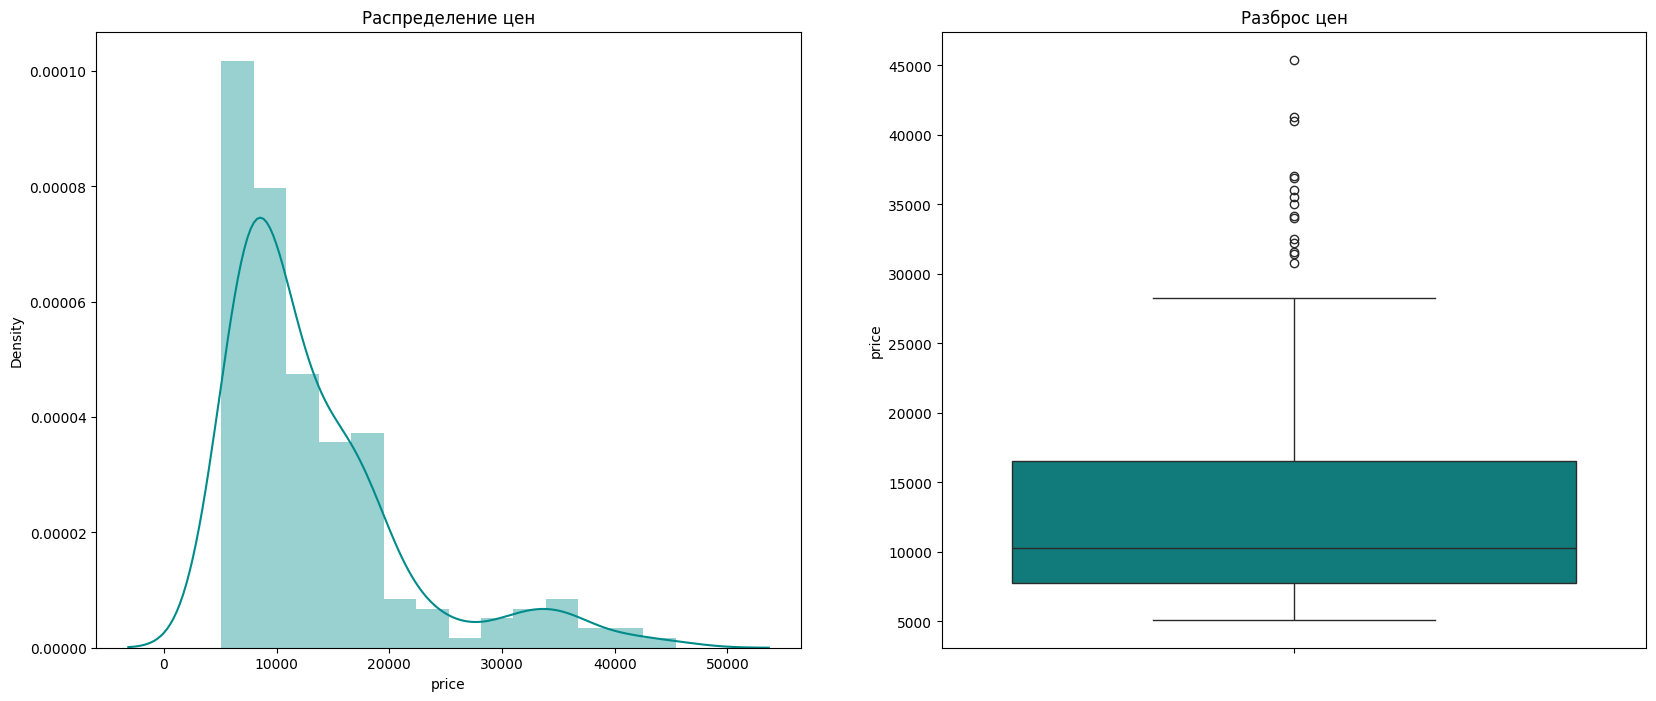

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Распределение цен')
sns.distplot(df["price"], color='darkcyan')

plt.subplot(1,2,2)
plt.title('Разброс цен')
sns.boxplot(y=df["price"], color='darkcyan')

plt.show()

In [13]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Исходя из графиков можно сделать следующие выводы:
- большая часть автомобилей находится в низком ценовом сегменте (цена менее 15000)
- среднее и медианное значения существенно отличаются
- значения цен сильно отличаются от среднего, что говорит о высокой дисперсии распределения

### Проанализируем категориальные признаки

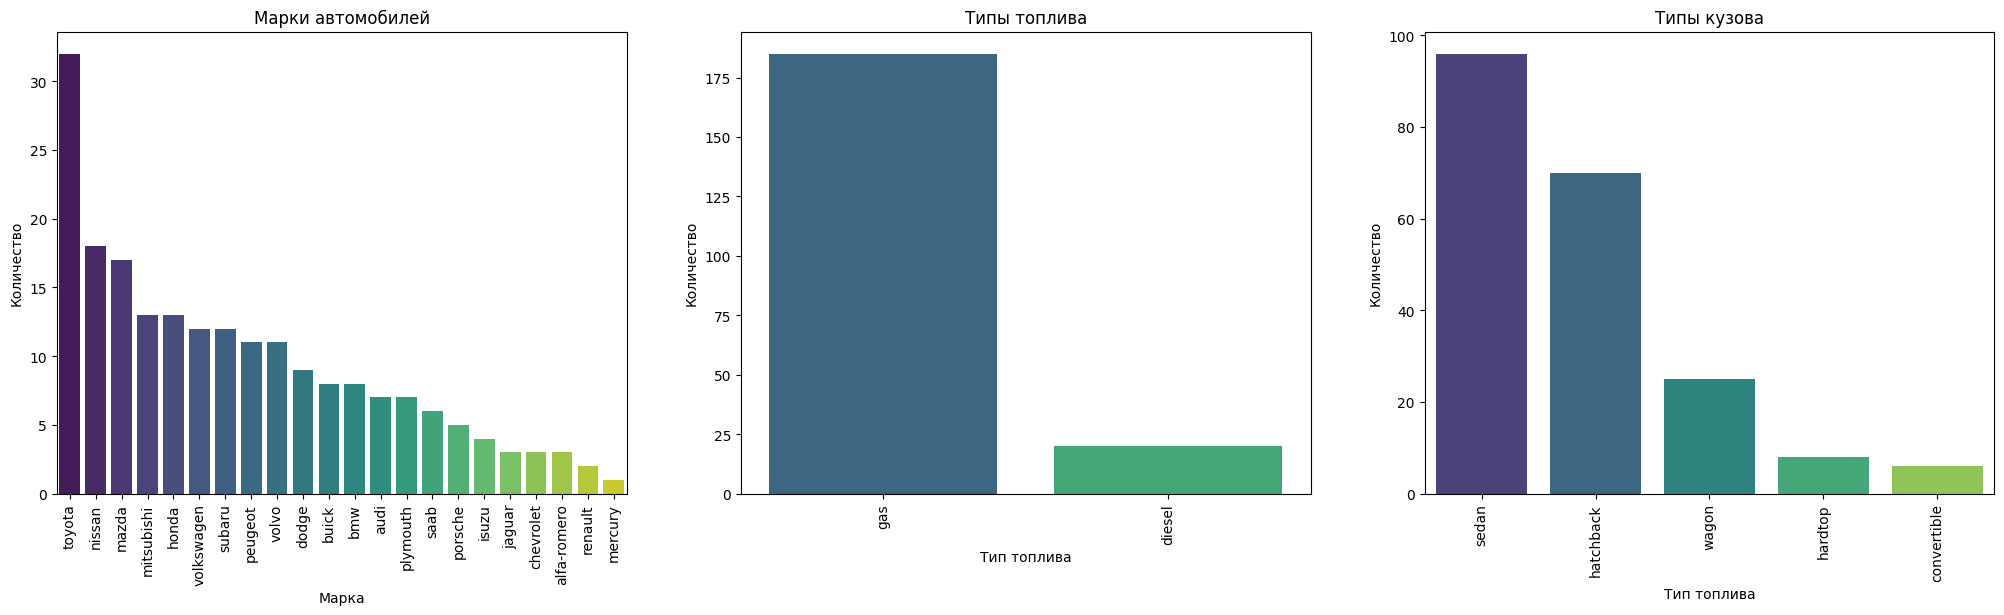

In [14]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt.title('Марки автомобилей')
brands = df['brand'].value_counts()
plt1 = sns.barplot(x=brands.index, y=brands, palette='viridis')
plt1.tick_params(axis='x', rotation=90)
plt1.set(xlabel = 'Марка', ylabel='Количество')

plt.subplot(1,3,2)
plt.title('Типы топлива')
fuelTypes = df['fueltype'].value_counts()
plt2 = sns.barplot(x=fuelTypes.index, y=fuelTypes, palette='viridis')
plt2.tick_params(axis='x', rotation=90)
plt2.set(xlabel = 'Тип топлива', ylabel='Количество')

plt.subplot(1,3,3)
plt.title('Типы кузова')
carBodys = df['carbody'].value_counts()
plt3 = sns.barplot(x=carBodys.index, y=carBodys, palette='viridis')
plt3.tick_params(axis='x', rotation=90)
plt3.set(xlabel = 'Тип топлива', ylabel='Количество')

plt.show()

Из графиков видно, что:
- Среди марок машин Toyota - наиболее популярная
- Автомобилей на бензине значительно больше, чем на дизеле
- Среди автомобилей чаще других встречается тип кузова "седан"

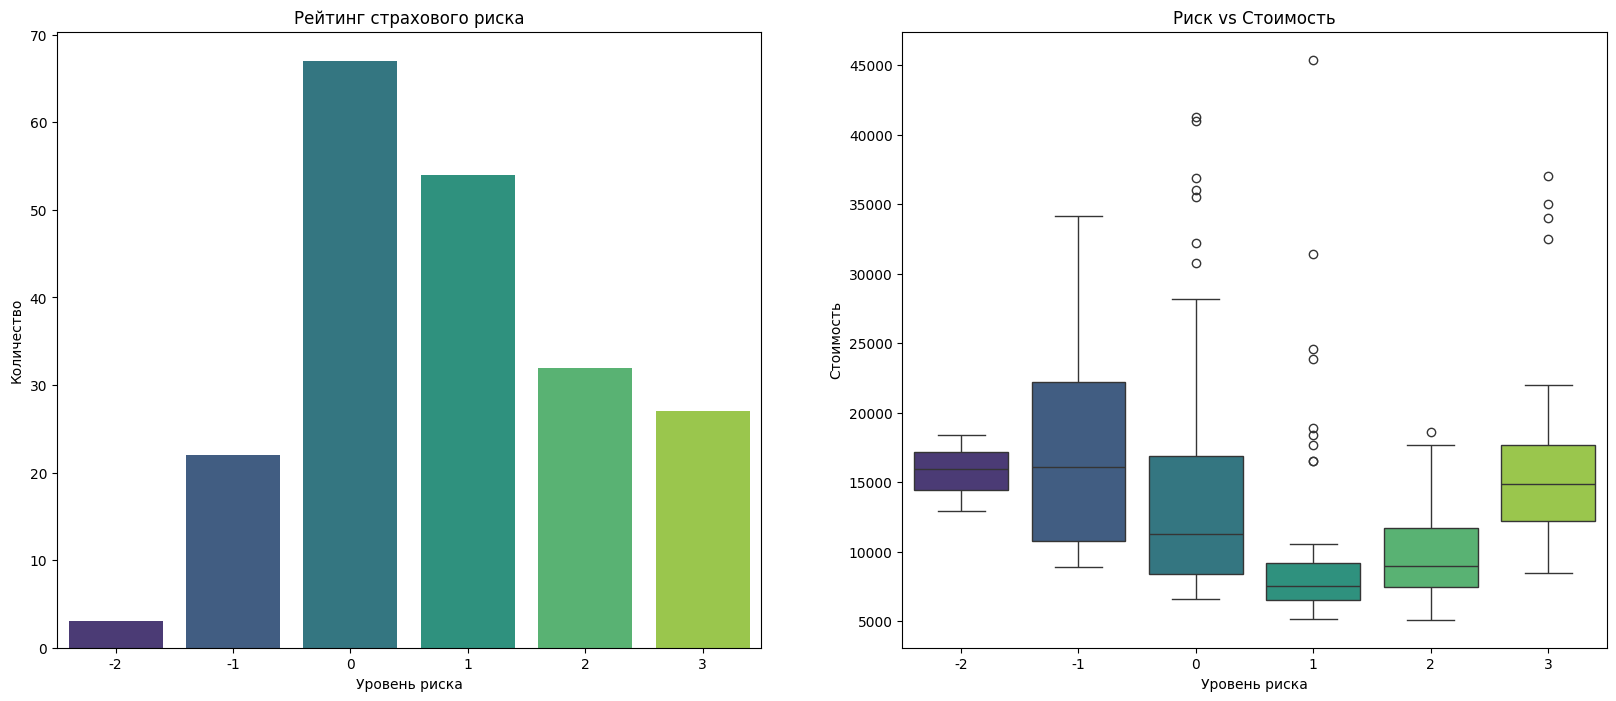

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Рейтинг страхового риска')
plt1 = sns.countplot(df, x="symboling", palette='viridis')
plt1.set(xlabel = 'Уровень риска', ylabel='Количество')

plt.subplot(1,2,2)
plt.title('Риск vs Стоимость')
plt2 = sns.boxplot(x=df['symboling'], y=df['price'], palette='viridis')
plt2.set(xlabel = 'Уровень риска', ylabel='Стоимость')

plt.show()

Выводы:
- Автомобили с уровнями риска *1* и *2* продаются чаще остальных
- Автомобили с уровнем риска *-1* стоят дорого, поскольку это хороший рейтинг. На уровне *1* наблюдается падение цены.

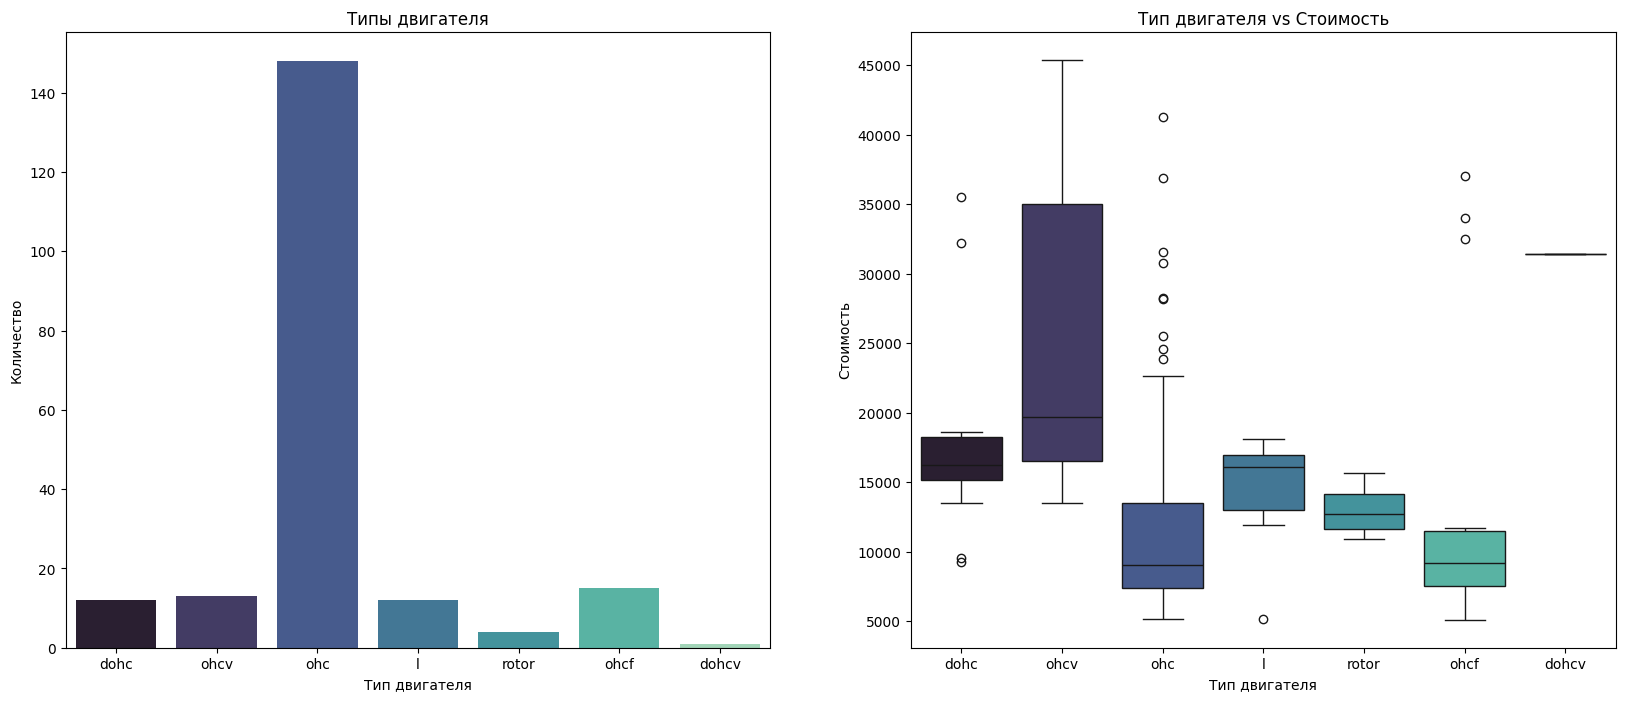

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Типы двигателя')
plt1 = sns.countplot(df, x='enginetype', palette='mako')
plt1.set(xlabel = 'Тип двигателя', ylabel='Количество')

plt.subplot(1,2,2)
plt.title('Тип двигателя vs Стоимость')
plt2 = sns.boxplot(x=df['enginetype'], y=df['price'], palette='mako')
plt2.set(xlabel = 'Тип двигателя', ylabel='Стоимость')

plt.show()

Выводы:
- Тип двигателя *ohc* встречается чаще остальных
- Тип двигателя *ohcv* имеет наибольший разброс цен. Типы *ohc*, *ohcf* и *dohcv*, наоборот, имеют небольшой ценовой диапазон

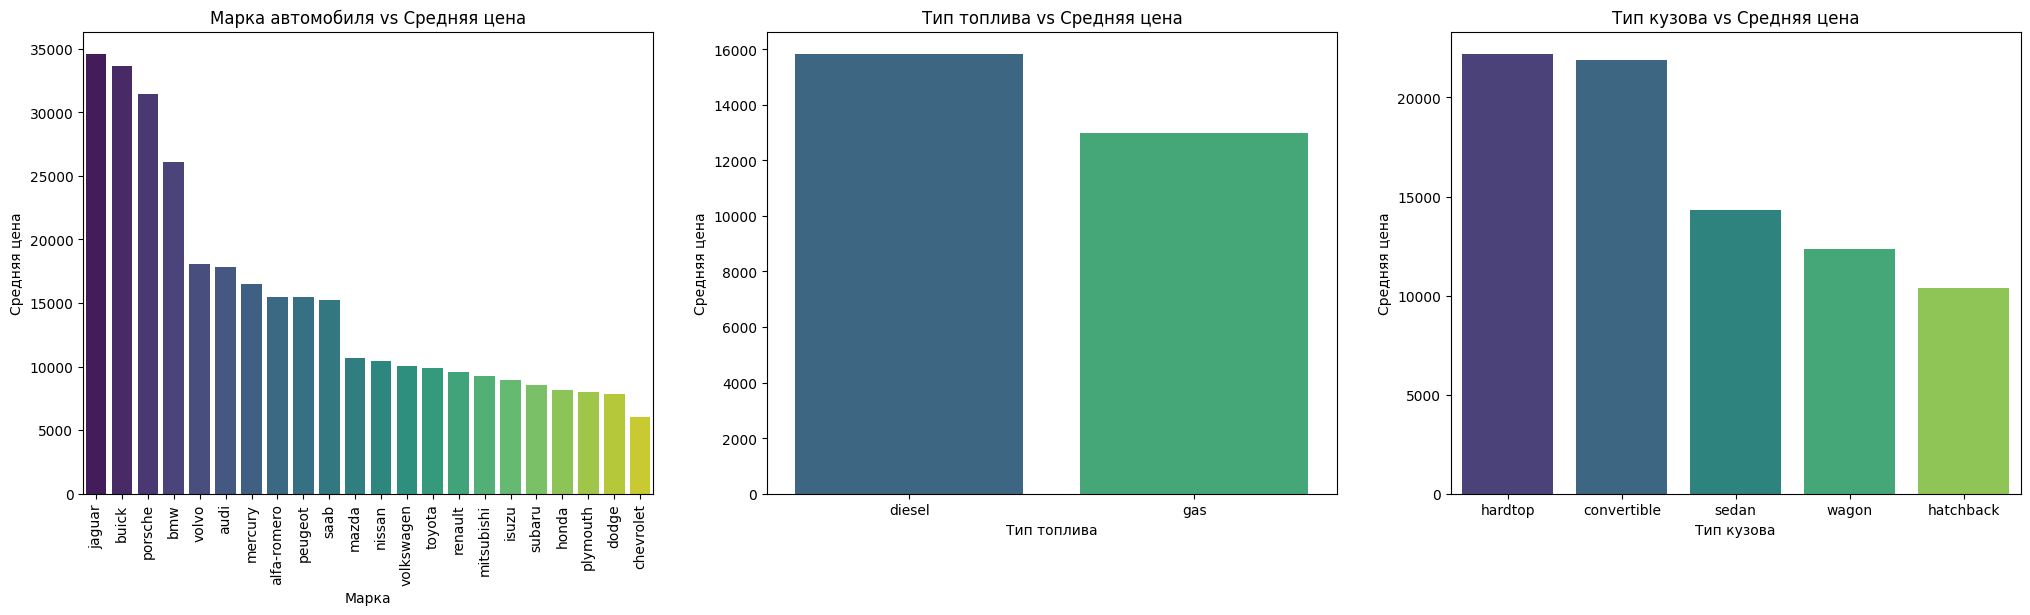

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt.title('Марка автомобиля vs Средняя цена')
brand_price = df.groupby(['brand'])['price'].mean().sort_values(ascending = False)
plt1 = sns.barplot(x=brand_price.index, y=brand_price, palette='viridis')
plt1.tick_params(axis='x', rotation=90)
plt1.set(xlabel = 'Марка', ylabel='Средняя цена')

plt.subplot(1,3,2)
plt.title('Тип топлива vs Средняя цена')
fueltype_price = df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False)
plt2 = sns.barplot(x=fueltype_price.index, y=fueltype_price, palette='viridis')
plt2.set(xlabel = 'Тип топлива', ylabel='Средняя цена')

plt.subplot(1,3,3)
plt.title('Тип кузова vs Средняя цена')
carbody_price = df.groupby(['carbody'])['price'].mean().sort_values(ascending = False)
plt3 = sns.barplot(x=carbody_price.index, y=carbody_price, palette='viridis')
plt3.set(xlabel = 'Тип кузова', ylabel='Средняя цена')

plt.show()


Выводы:
- *Jaguar*, *Buick* и *Porsche* - самые дорогие марки
- Автомобили на дизельном топливе в среднем дороже, чем на бензине
- Типы кузова *hardtop* и *convertible* дороже остальных

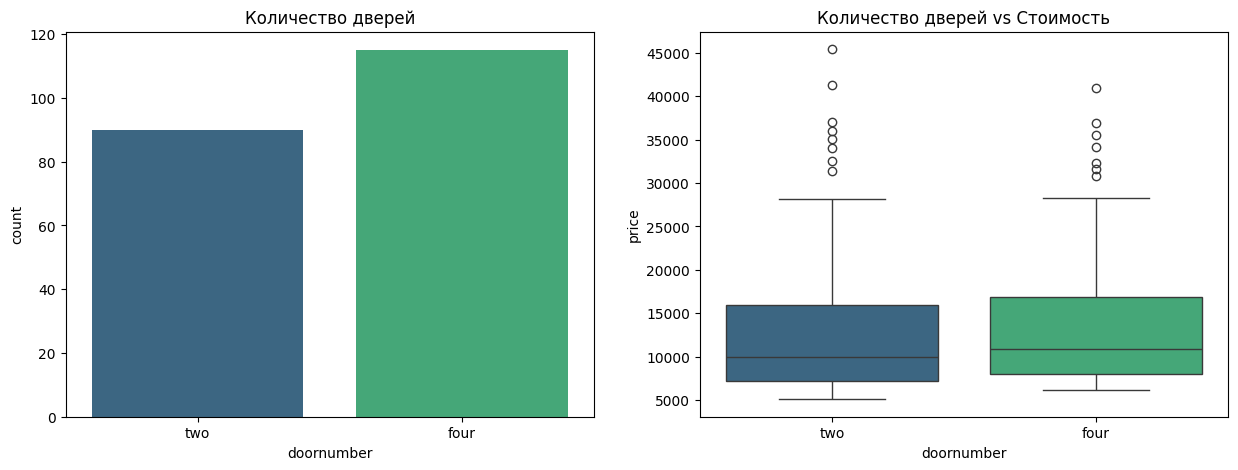

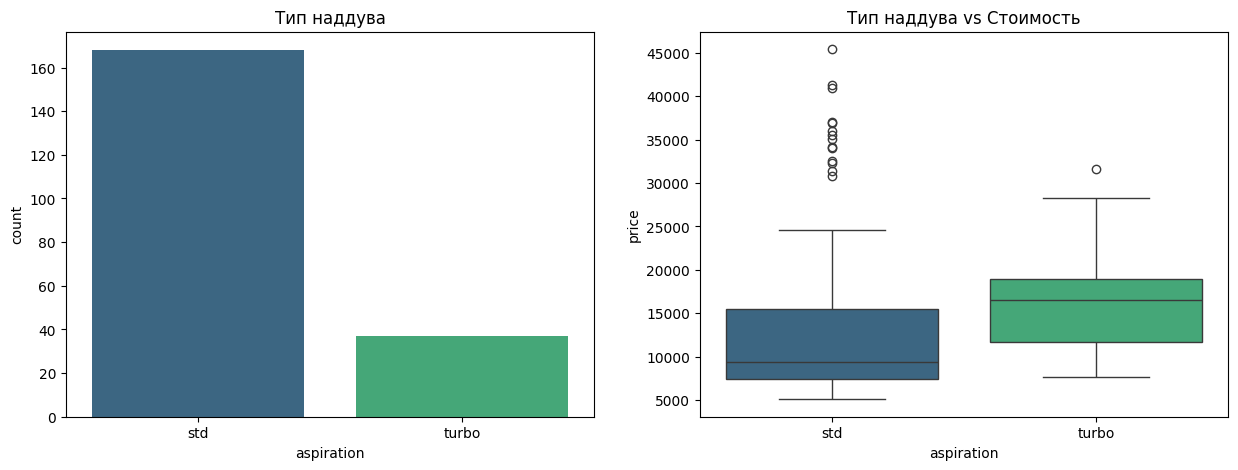

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Количество дверей')
sns.countplot(df, x='doornumber', palette='viridis')

plt.subplot(1,2,2)
plt.title('Количество дверей vs Стоимость')
sns.boxplot(x=df['doornumber'], y=df['price'], palette='viridis')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Тип наддува')
sns.countplot(df, x='aspiration', palette='viridis')

plt.subplot(1,2,2)
plt.title('Тип наддува vs Стоимость')
sns.boxplot(x=df['aspiration'], y=df['price'], palette='viridis')

plt.show()


Выводы:
- Количество дверей не сильно влияет на стоимость автомобиля
- Автомобили с турбированным двигателем в среднем стоят дороже, хотя и есть некоторые выбросы в категории *std*

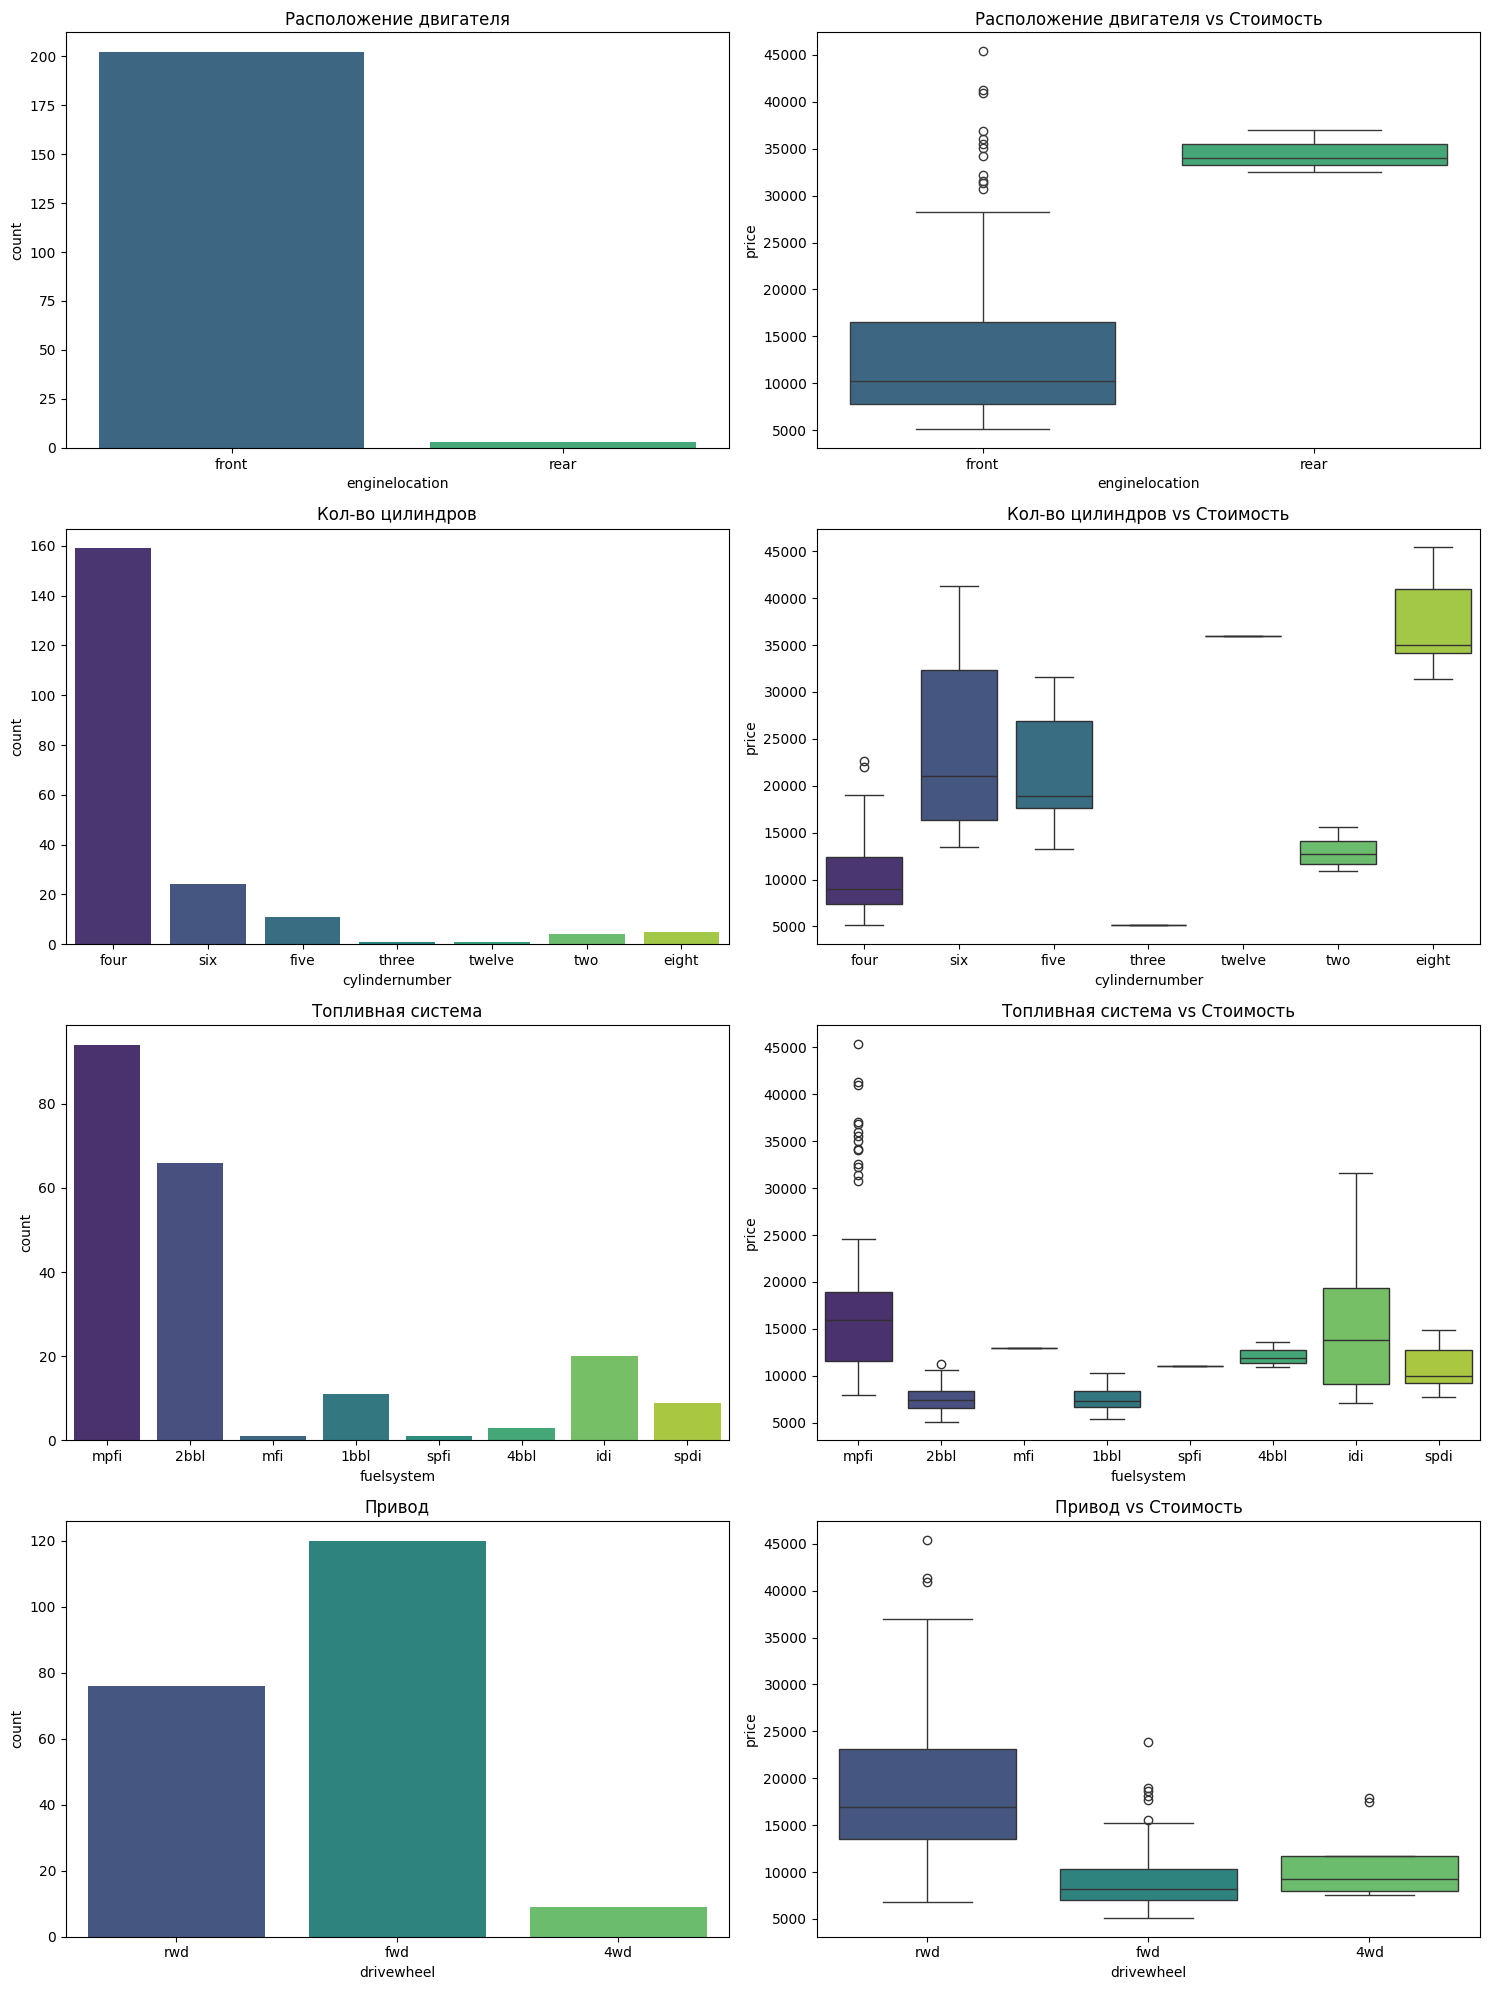

In [19]:
def plot_count(x,fig,title):
    plt.subplot(4,2,fig)
    plt.title(title)
    sns.countplot(df, x=x, palette='viridis')
    plt.subplot(4,2,(fig+1))
    plt.title(title + ' vs Стоимость')
    sns.boxplot(x=df[x], y=df['price'], palette='viridis')
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1, 'Расположение двигателя')
plot_count('cylindernumber', 3, 'Кол-во цилиндров')
plot_count('fuelsystem', 5, 'Топливная система')
plot_count('drivewheel', 7, 'Привод')

plt.tight_layout()

Выводы:
- Слишком мало значений, чтобы проанализировать признак *enginelocation*
- Чаще всего встречаются автомобили с 4/5/6-цилиндровыми двигателями. Двигатели с 8 цилиндрами наиболее дорогие.
- Чаще всего встречаются топливные системы *mpfi* и *2bbl*. Наиболее дорогие - *mpfi* и *idi*.
- Переднеприводных и заднеприводных автомобилей намного больше, чем полноприводных. Самые дорогие - заднеприводные.

### Проанализируем числовые признаки

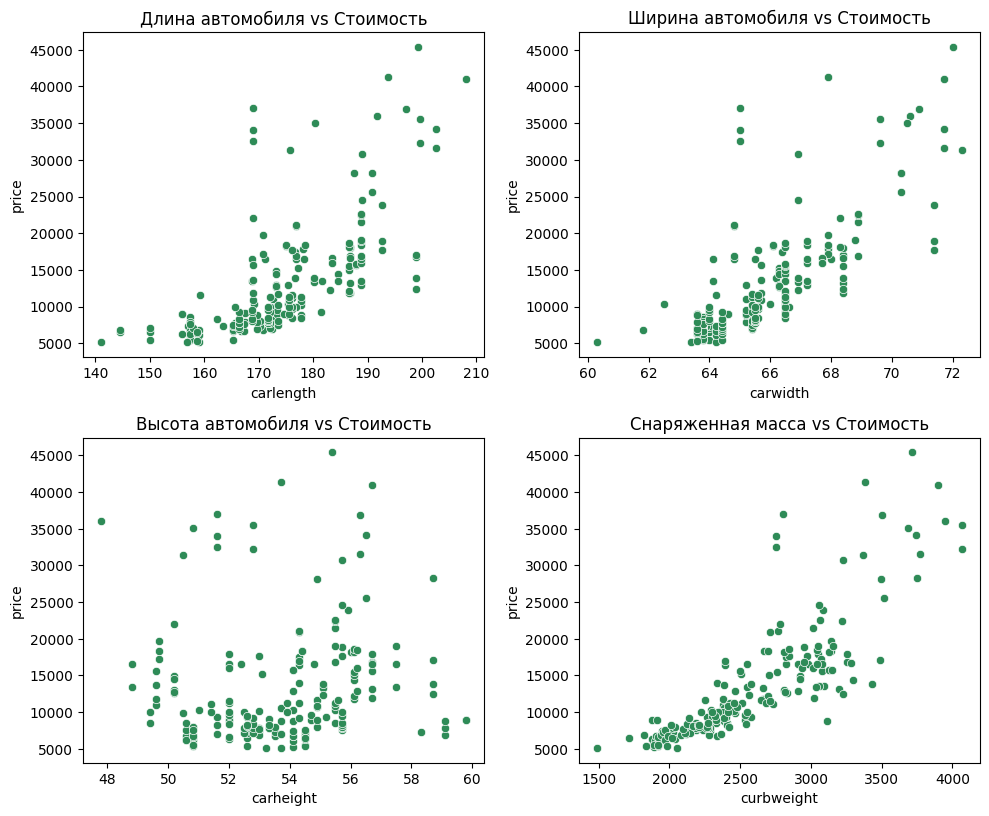

In [20]:
def scatter(x,fig,title):
    plt.subplot(5,2,fig)
    sns.scatterplot(data=df, x=x, y='price', color="seagreen")
    plt.title(title)
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1, 'Длина автомобиля vs Стоимость')
scatter('carwidth', 2, 'Ширина автомобиля vs Стоимость')
scatter('carheight', 3, 'Высота автомобиля vs Стоимость')
scatter('curbweight', 4, 'Снаряженная масса vs Стоимость')

plt.tight_layout()

Выводы:
- На первый взгляд, признаки *carwidth*, *carlength* и *curbweight* имеют положительную корелляцию со стоимостью автомобиля
- Стоимость автомобиля не сильно зависит от его высоты

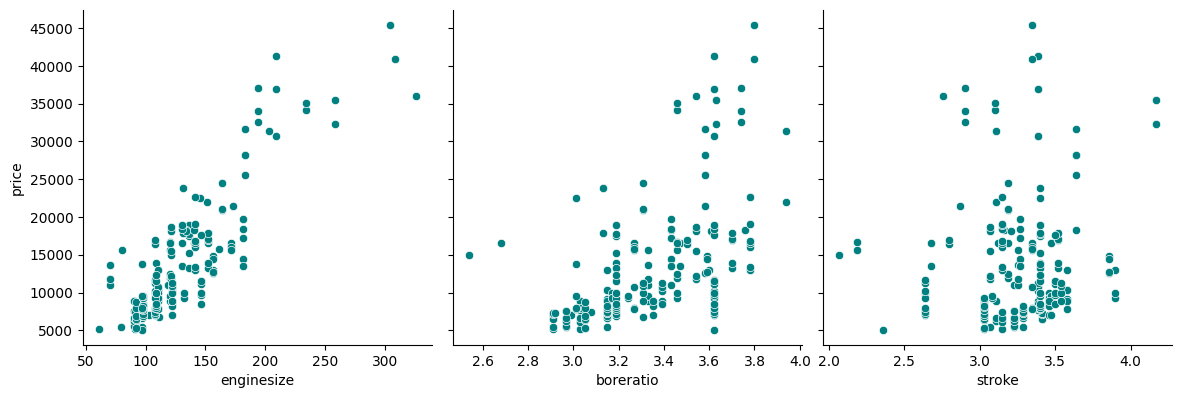

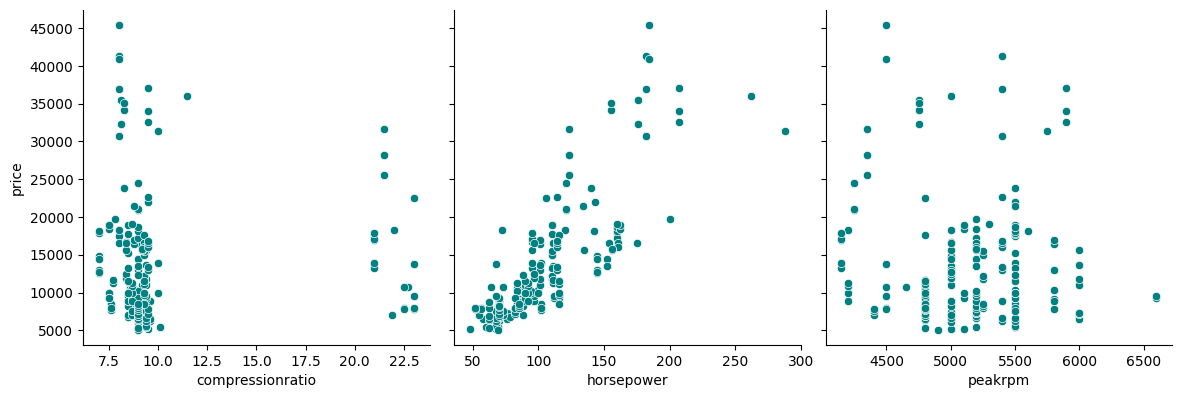

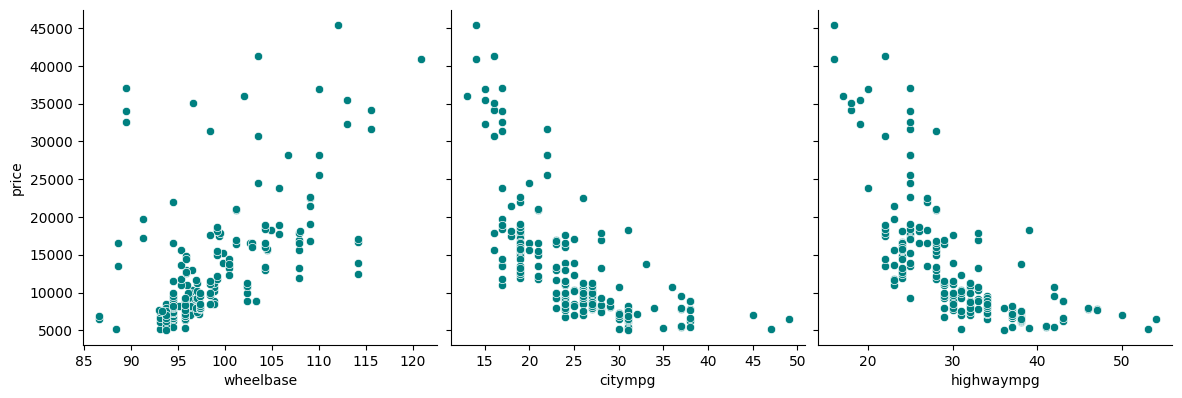

In [21]:
def pairplot(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price', size=4, aspect=1, kind='scatter', plot_kws={'color': 'teal'})
    plt.show()

pairplot('enginesize', 'boreratio', 'stroke')
pairplot('compressionratio', 'horsepower', 'peakrpm')
pairplot('wheelbase', 'citympg', 'highwaympg')

Выводы:
- Признаки *enginesize*, *boreratio*, *horsepower*, *wheelbase*, вероятно, имеют положительную корелляцию с ценой автомобиля
- Признаки *citympg*, *highwaympg* - наоборот, отрицательно кореллируют с ценой

### Наиболее важные признаки после визуального анализа
- enginetype 
- fueltype 
- carbody 
- aspiration 
- cylindernumber 
- drivewheel 
- curbweight 
- carlength
- carwidth
- enginesize 
- boreratio 
- horsepower 
- wheelbase

In [22]:
df_upd = df[['price', 'enginetype','fueltype','carbody','aspiration','cylindernumber','drivewheel',
             'curbweight','carlength','carwidth','enginesize','boreratio','horsepower','wheelbase']]
df_upd.head()

,price,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase
0,13495.0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6
1,16500.0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6
2,16500.0,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5
3,13950.0,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8
4,17450.0,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4


### Преобразуем категориальные признаки

In [23]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df_upd = dummies('fueltype',df_upd)
df_upd = dummies('aspiration',df_upd)
df_upd = dummies('carbody',df_upd)
df_upd = dummies('drivewheel',df_upd)
df_upd = dummies('enginetype',df_upd)
df_upd = dummies('cylindernumber',df_upd)

In [24]:
print(df_upd.columns.tolist())
df_upd.head()

['price', 'curbweight', 'carlength', 'carwidth', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two']


,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
1,16500.0,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
2,16500.0,2823,171.2,65.5,152,2.68,154,94.5,True,False,...,False,False,True,False,False,False,True,False,False,False
3,13950.0,2337,176.6,66.2,109,3.19,102,99.8,True,False,...,True,False,False,False,False,True,False,False,False,False
4,17450.0,2824,176.6,66.4,136,3.19,115,99.4,True,False,...,True,False,False,False,True,False,False,False,False,False


### Проверим корелляцию

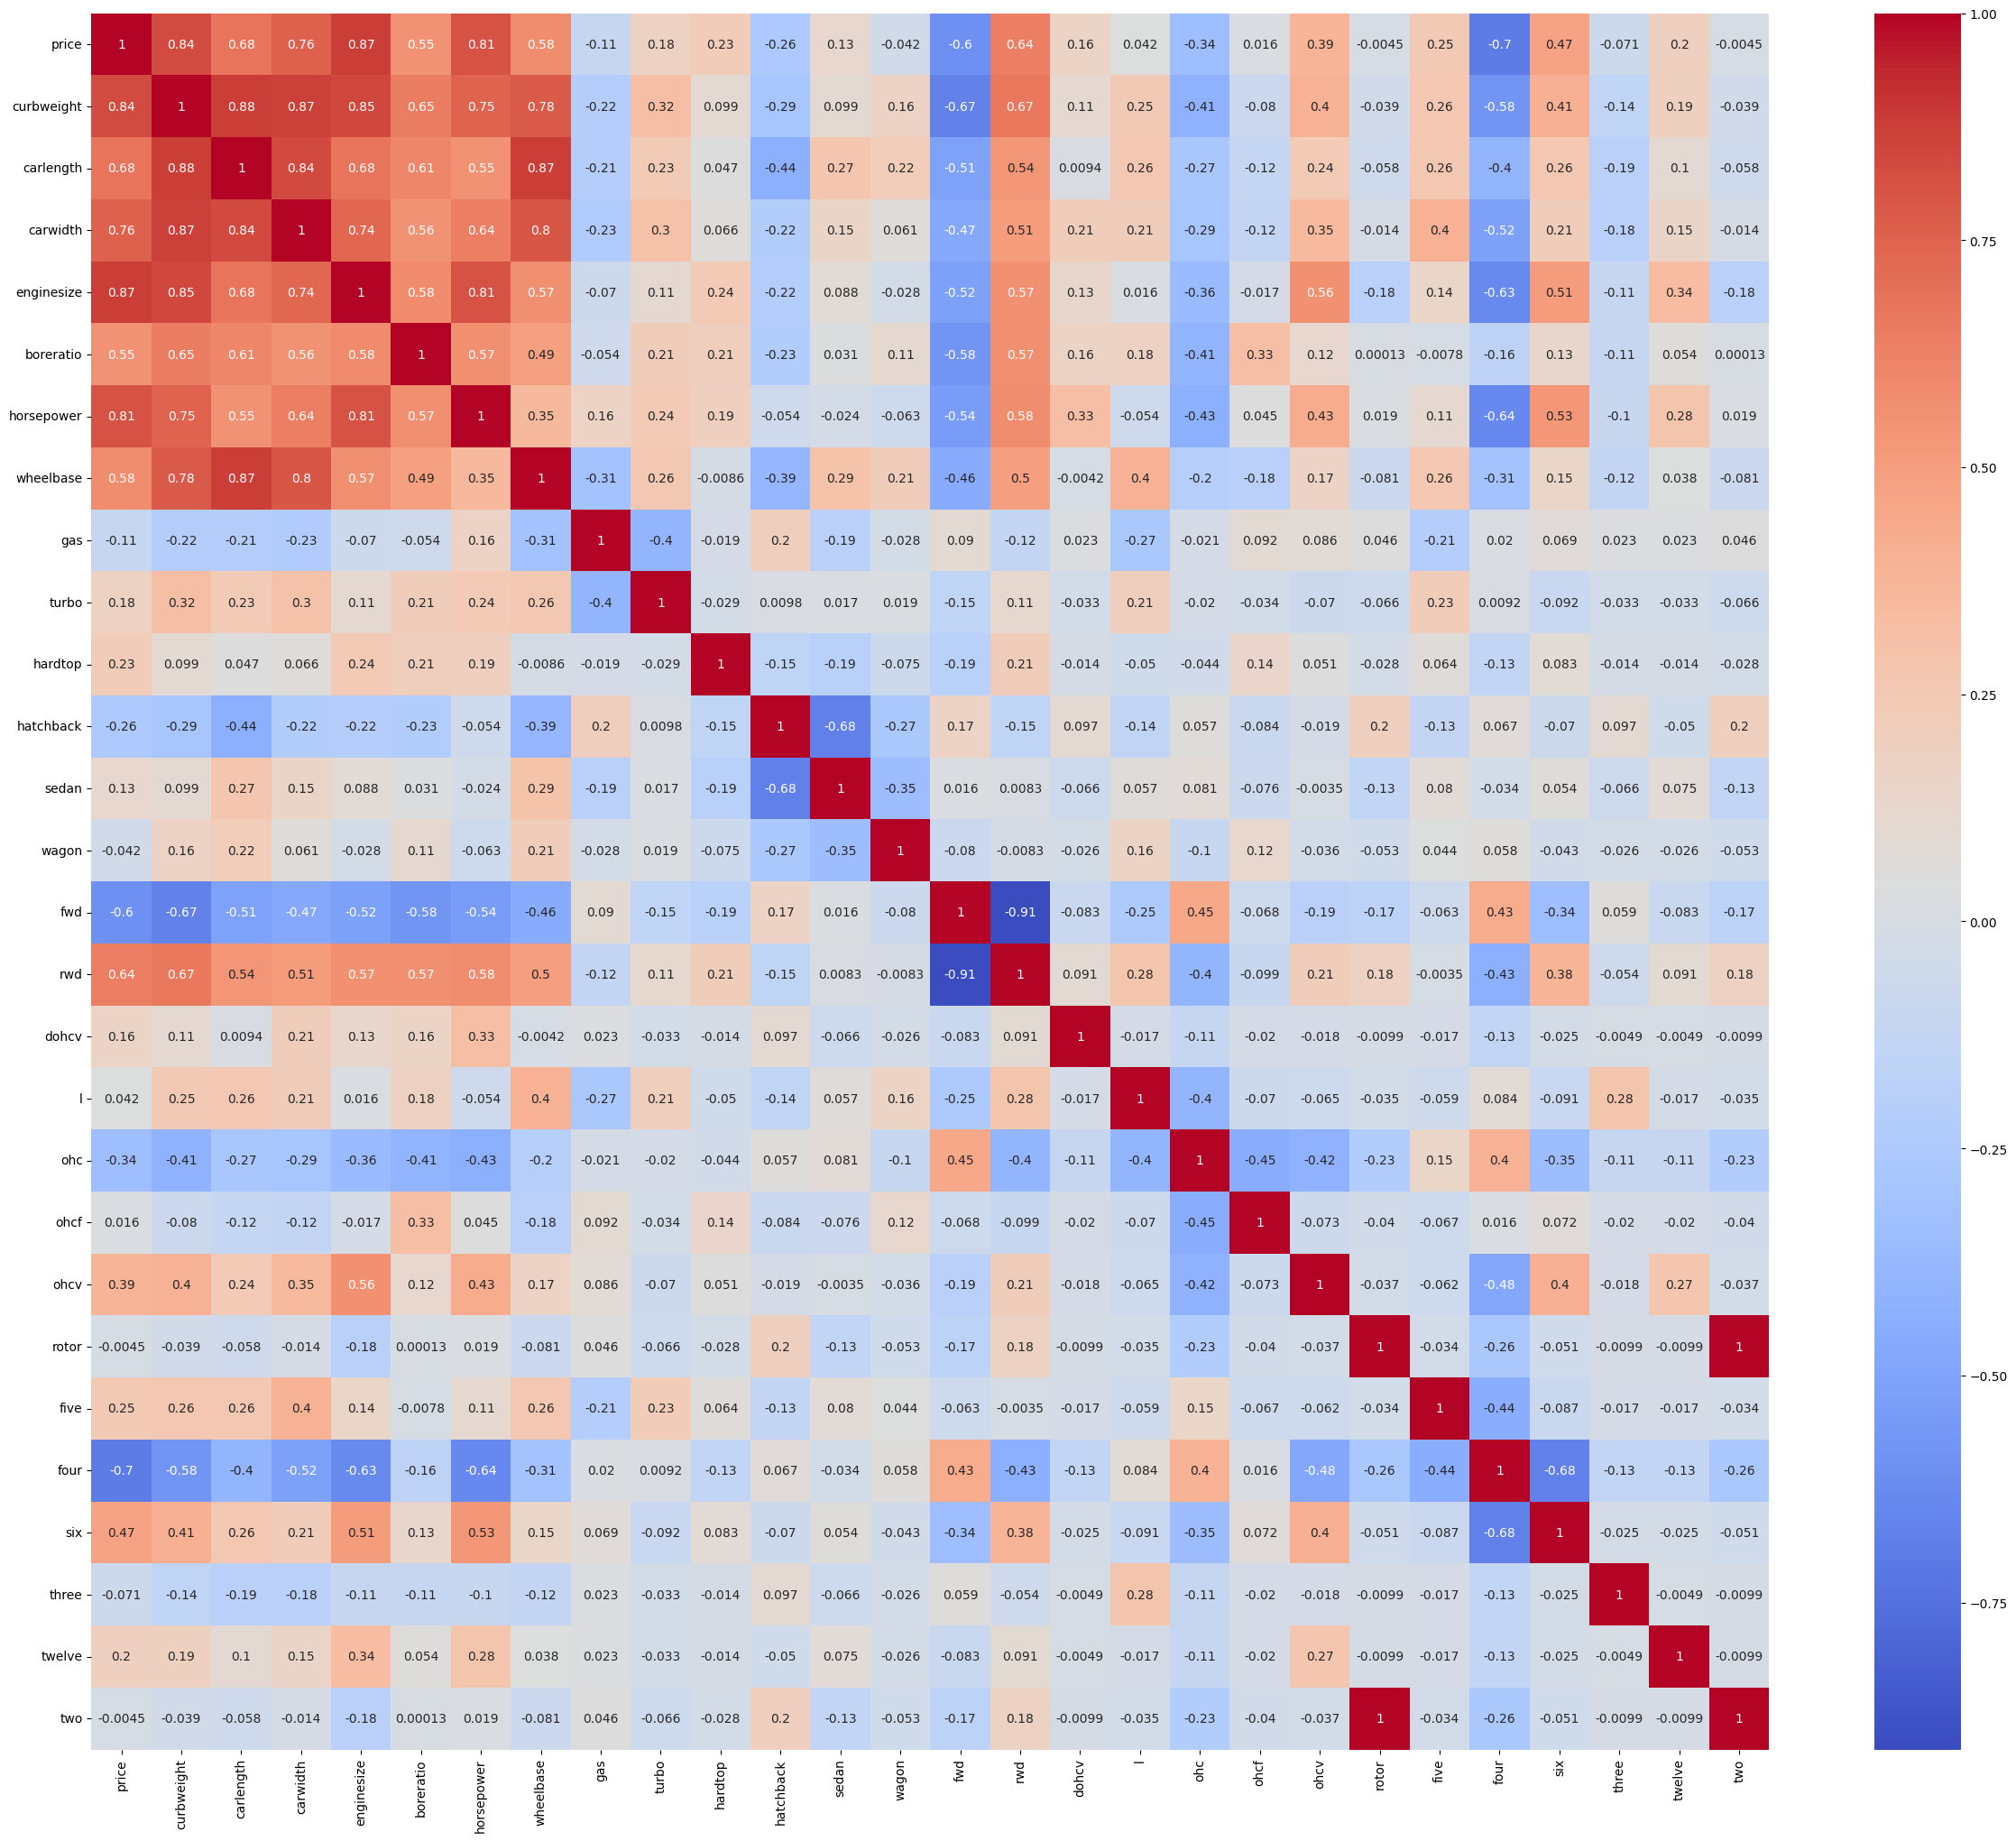

In [25]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_upd.corr(), annot = True, cmap="coolwarm")
plt.show()

Сильно кореллируют признаки *curbweight*, *carlength*, *carwidth*, *enginesize*, *horsepower*, а также dummy-признаки *fwd*, *rwd* и *four*.

# Подготовка данных

Случайным образом разобьем датасет на обучающую и тестовую выборки

In [26]:
from sklearn.model_selection import train_test_split

X = df_upd.drop(['price'], axis=1)
Y = df_upd['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=555)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

Произведем масштабирование данных

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Подберем наилучшее количество (и само подмножество) признаков, используя Recursive Feature Elimination (RFE)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

rfe = RFE(estimator=LogisticRegression(), step=1)
lab = LabelEncoder()

Y_transformed = lab.fit_transform(Y_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
rfe.fit(X_train_scaled_df, Y_transformed)

optimal_features = rfe.n_features_
selected_features = list(X_train_scaled_df.columns[rfe.support_])

In [29]:
print(f"Оптимальное число признаков = {optimal_features}")
print(f'Выбранные признаки = {selected_features}')

Оптимальное число признаков = 13
Выбранные признаки = ['carlength', 'carwidth', 'boreratio', 'horsepower', 'wheelbase', 'turbo', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'ohc', 'four']


In [30]:
X_train_eliminated = X_train_scaled_df[selected_features].to_numpy(copy=True)
X_test_eliminated = pd.DataFrame(X_test_scaled, columns=X.columns)[selected_features].to_numpy()

# Линейная регрессия

Обучать модель линейной регрессии будем, используя функцию ошибки **MSE** и **$L_2$**-регуляризатор:

$Q(w)=\frac{1}{n} \sum_{i=1}^n (y_i - (Xw)_i)^2 + \alpha (w^Tw)$

### Подбор гиперпараметров

Подберем гиперпараметры с помощью **GridSearchCV**

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_grid = np.logspace(-5, -3, 10)
epsilon_grid = np.logspace(-5, -3, 10)

searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid, "tol": epsilon_grid}], scoring="neg_root_mean_squared_error", cv=5)
_ = searcher.fit(X_train_eliminated, Y_train)

In [32]:
optimal_alpha = searcher.best_params_["alpha"]
print(f"Best alpha = {optimal_alpha}")

optimal_epsilon = searcher.best_params_["tol"]
print(f"Best epsilon = {optimal_epsilon}")

Best alpha = 0.001
Best epsilon = 1e-05


## Обучение с использованием существующей библиотеки

Обучим модель с помощью **Ridge** из **sklearn**.

In [33]:
ridge = Ridge(alpha=optimal_alpha, tol=optimal_epsilon)
_ = ridge.fit(X_train_eliminated, Y_train)

Оценим качество получившейся модели ridge c оптимальными гиперпараметрами и числом признаков

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

y_train_pred_ridge = ridge.predict(X_train_eliminated)
y_test_pred_ridge = ridge.predict(X_test_eliminated)

print(f"MSE train = {mean_squared_error(Y_train, y_train_pred_ridge, squared=True)}")
print(f"MSE test = {mean_squared_error(Y_test, y_test_pred_ridge, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(Y_train, y_train_pred_ridge, squared=False)}")
print(f"RMSE test = {mean_squared_error(Y_test, y_test_pred_ridge, squared=False)}\n")

print(f"MAE train = {mean_absolute_error(Y_train, y_train_pred_ridge)}")
print(f"MAE test = {mean_absolute_error(Y_test, y_test_pred_ridge)}\n")

print(f"MAPE train = {mean_absolute_percentage_error(Y_train, y_train_pred_ridge)}")
print(f"MAPE test = {mean_absolute_percentage_error(Y_test, y_test_pred_ridge)}\n")

print(f"R^2 train = {r2_score(Y_train, y_train_pred_ridge)}")
print(f"R^2 test = {r2_score(Y_test, y_test_pred_ridge)}")

MSE train = 8480759.294810187
MSE test = 15273343.677410753

RMSE train = 2912.174324248153
RMSE test = 3908.1125466663257

MAE train = 2123.7624900711107
MAE test = 2748.5628064864636

MAPE train = 0.1690708398982111
MAPE test = 0.18552000093516136

R^2 train = 0.8670946069692655
R^2 test = 0.753738015216916


## Собственная реализация

### Метод градиентного спуска

Найдем градиент функции потерь:

$Q(w)=\frac{1}{n} \sum_{i=1}^n (y_i - (Xw)_i)^2 + \alpha (w^Tw) = \frac{1}{n} \sum_{i=1}^n (y_i - (\sum_{j=1}^m X^j w_j)_i)^2 + \alpha \sum_{j=1}^m w_j^2$

$\frac{\partial Q}{\partial w_j} = - \frac{2}{n} \sum_{i=1}^n x_{ij} (y_i - (Xw)_i) + 2 \alpha w_j = - \frac{2}{n} (X^j)^T (Y - Xw) + 2 \alpha w_j$

$\nabla Q(w) = - \frac{2}{n} X^T (Y - Xw) + 2 \alpha w$

На константу можно сократить:

$\nabla Q(w) = - \frac{1}{n} X^T (Y - Xw) + \alpha w$

In [35]:
import numpy as np

np.set_printoptions(precision=4)
np.random.seed(777)

# Добавление фиктивного признака
def add_dummy(X: np.ndarray) -> np.ndarray:
    X_copy = X.copy()
    ones = np.ones((X_copy.shape[0], 1))
    return np.concatenate((ones, X_copy), axis=1)

def linear_model(X: np.ndarray, W: np.ndarray) -> np.ndarray:
    X = add_dummy(X)
    return np.matmul(X, W)

In [147]:
def get_gradient(X: np.ndarray, Y: np.ndarray, w: np.ndarray, alpha: float) -> np.ndarray:
    n = X.shape[0]
    return -1/n * (np.matmul(X.T, Y - np.matmul(X, w))) + alpha*w


def gradient_descent(X: np.ndarray, Y: np.ndarray, Alpha=1E-2, Lambda=1, Eps=1E-10) -> np.ndarray:
    (n, m) = X.shape

    X = add_dummy(X)

    w_prev = w = np.zeros(m + 1)
    delta = gradient = np.full(m + 1, 100000)

    k = 1
    while not (np.all(abs(delta) < Eps) or np.all(abs(gradient) < Eps)):
        w_prev = w
        gradient = (1/k) * get_gradient(X, Y, w_prev, Alpha)
        w = w_prev - Lambda*gradient
        delta = w - w_prev
        k = k+1

    return w

In [148]:
w = gradient_descent(X=X_train_eliminated, Y=Y_train, Alpha=optimal_alpha, Eps=optimal_epsilon)

In [149]:
y_train_pred_gd = linear_model(X_train_eliminated, w)
y_test_pred_gd = linear_model(X_test_eliminated, w)

print(f"MSE train = {mean_squared_error(Y_train, y_train_pred_gd, squared=True)}")
print(f"MSE test = {mean_squared_error(Y_test, y_test_pred_gd, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(Y_train, y_train_pred_gd, squared=False)}")
print(f"RMSE test = {mean_squared_error(Y_test, y_test_pred_gd, squared=False)}\n")

print(f"MAE train = {mean_absolute_error(Y_train, y_train_pred_gd)}")
print(f"MAE test = {mean_absolute_error(Y_test, y_test_pred_gd)}\n")

print(f"MAPE train = {mean_absolute_percentage_error(Y_train, y_train_pred_gd)}")
print(f"MAPE test = {mean_absolute_percentage_error(Y_test, y_test_pred_gd)}\n")

print(f"R^2 train = {r2_score(Y_train, y_train_pred_gd)}")
print(f"R^2 test = {r2_score(Y_test, y_test_pred_gd)}")

MSE train = 8604733.921294887
MSE test = 15352660.276446227

RMSE train = 2933.3826755632967
RMSE test = 3918.2470923164387

MAE train = 2128.640442942194
MAE test = 2801.3155341852894

MAPE train = 0.1690777654277538
MAPE test = 0.19098766208236595

R^2 train = 0.8651517506888297
R^2 test = 0.7524591424620517


### Метод стохастического градиентного спуска

In [128]:
def get_stochastic_gradient(X: np.ndarray, Y: np.ndarray, w: np.ndarray, alpha: float) -> np.ndarray:
    return -X.T * (Y - np.dot(X, w)) + alpha*w


def stochastic_gradient_descent(X: np.ndarray, Y: np.ndarray, Alpha=1E-3, Lambda=1, Eps=1E-8, max_steps=1_000_000) -> np.ndarray:
    (n, m) = X.shape

    X = add_dummy(X)

    w_prev = np.zeros(m + 1)
    w = np.random.randn(m + 1)
    delta = gradient = np.full(m + 1, 100000)

    k = 1
    while not (np.all(abs(delta) < Eps) or np.all(abs(gradient) < Eps)) and k < max_steps:
        idx = np.random.randint(0, n)
        w_prev = w
        gradient = (1/k) * get_stochastic_gradient(X[idx,:], Y[idx], w_prev, Alpha)
        w = w_prev - Lambda*gradient
        delta = w - w_prev
        k = k+1

    return w

In [135]:
w = stochastic_gradient_descent(X=X_train_eliminated, Y=Y_train, Alpha=optimal_alpha, Eps=optimal_epsilon)

In [136]:
y_train_pred_gd = linear_model(X_train_eliminated, w)
y_test_pred_gd = linear_model(X_test_eliminated, w)

print(f"MSE train = {mean_squared_error(Y_train, y_train_pred_gd, squared=True)}")
print(f"MSE test = {mean_squared_error(Y_test, y_test_pred_gd, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(Y_train, y_train_pred_gd, squared=False)}")
print(f"RMSE test = {mean_squared_error(Y_test, y_test_pred_gd, squared=False)}\n")

print(f"MAE train = {mean_absolute_error(Y_train, y_train_pred_gd)}")
print(f"MAE test = {mean_absolute_error(Y_test, y_test_pred_gd)}\n")

print(f"MAPE train = {mean_absolute_percentage_error(Y_train, y_train_pred_gd)}")
print(f"MAPE test = {mean_absolute_percentage_error(Y_test, y_test_pred_gd)}\n")

print(f"R^2 train = {r2_score(Y_train, y_train_pred_gd)}")
print(f"R^2 test = {r2_score(Y_test, y_test_pred_gd)}")

MSE train = 11844275.773886241
MSE test = 20532703.10181116

RMSE train = 3441.551361506354
RMSE test = 4531.302583343024

MAE train = 2552.1748630216066
MAE test = 3081.840227595837

MAPE train = 0.20284871447023667
MAPE test = 0.20566099556533782

R^2 train = 0.8143835861659142
R^2 test = 0.6689379663280776


### Метод мини-пакетного градиентного спуска

In [141]:
def get_gradient(X: np.ndarray, Y: np.ndarray, w: np.ndarray, alpha: float) -> np.ndarray:
    n = X.shape[0]
    return -1/n * (np.matmul(X.T, Y - np.matmul(X, w))) + alpha*w


def mini_batch_gradient_descent(X: np.ndarray, Y: np.ndarray, batches=10, Alpha=1E-3, Lambda=1, Eps=1E-4, max_steps=1_000_000) -> np.ndarray:
    (n, m) = X.shape

    X = add_dummy(X)

    w_prev = w = np.zeros(m + 1)
    delta = gradient = np.full(m + 1, 100000)

    k = 1
    while not (np.all(abs(delta) < Eps) or np.all(abs(gradient) < Eps)) and k < max_steps:
        indexes = np.random.randint(0, n, batches)
        w_prev = w
        gradient = (1/k)*get_gradient(X[indexes,:], Y[indexes], w_prev, Alpha)
        w = w_prev - Lambda*gradient
        delta = w - w_prev
        k = k+1

    return w

In [142]:
w = mini_batch_gradient_descent(X=X_train_eliminated, Y=Y_train, Alpha=optimal_alpha, Eps=optimal_epsilon)

In [143]:
y_train_pred_gd = linear_model(X_train_eliminated, w)
y_test_pred_gd = linear_model(X_test_eliminated, w)

print(f"MSE train = {mean_squared_error(Y_train, y_train_pred_gd, squared=True)}")
print(f"MSE test = {mean_squared_error(Y_test, y_test_pred_gd, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(Y_train, y_train_pred_gd, squared=False)}")
print(f"RMSE test = {mean_squared_error(Y_test, y_test_pred_gd, squared=False)}\n")

print(f"MAE train = {mean_absolute_error(Y_train, y_train_pred_gd)}")
print(f"MAE test = {mean_absolute_error(Y_test, y_test_pred_gd)}\n")

print(f"MAPE train = {mean_absolute_percentage_error(Y_train, y_train_pred_gd)}")
print(f"MAPE test = {mean_absolute_percentage_error(Y_test, y_test_pred_gd)}\n")

print(f"R^2 train = {r2_score(Y_train, y_train_pred_gd)}")
print(f"R^2 test = {r2_score(Y_test, y_test_pred_gd)}")

MSE train = 8908770.279305754
MSE test = 15472263.235625032

RMSE train = 2984.7563182453864
RMSE test = 3933.4797871128094

MAE train = 2174.0146076357532
MAE test = 2869.695910139389

MAPE train = 0.1745005071056275
MAPE test = 0.19949196819972362

R^2 train = 0.8603870745257183
R^2 test = 0.75053070670264


# Кросс-валидация

Градиентный спуск

In [124]:
from sklearn.model_selection import KFold

gd_cv_table = pd.DataFrame(index=['MSE train', 'MSE test',
                                  'RMSE train', 'RMSE test',
                                  'MAE train', 'MAE test',
                                  'MAPE train', 'MAPE test',
                                  'R2 train', 'R2 test'])
kfold = KFold(n_splits=5)

for fold, (train, test) in enumerate(kfold.split(X=X_train_eliminated, y=Y_train)):
    searcher.fit(X_train_eliminated[train, :], Y_train[train])

    optimal_alpha_fold = searcher.best_params_["alpha"]
    optimal_epsilon_fold = searcher.best_params_["tol"]

    W = gradient_descent(X_train_eliminated[train, :], Y_train[train],
                            Alpha=optimal_alpha_fold, Eps=optimal_epsilon_fold)

    y_fold_train = linear_model(X_train_eliminated[train, :], W)
    y_fold_test = linear_model(X_train_eliminated[test, :], W)

    gd_cv_table.insert(fold, f"Fold {fold + 1}",
                         [mean_squared_error(Y_train[train], y_fold_train, squared=True),
                          mean_squared_error(Y_train[test], y_fold_test, squared=True),
                          mean_squared_error(Y_train[train], y_fold_train, squared=False),
                          mean_squared_error(Y_train[test], y_fold_test, squared=False),
                          mean_absolute_error(Y_train[train], y_fold_train),
                          mean_absolute_error(Y_train[test], y_fold_test),
                          mean_absolute_percentage_error(Y_train[train], y_fold_train),
                          mean_absolute_percentage_error(Y_train[test], y_fold_test),
                          r2_score(Y_train[train], y_fold_train),
                          r2_score(Y_train[test], y_fold_test)])

mean = gd_cv_table.mean(axis=1)
std = gd_cv_table.std(axis=1)
gd_cv_table["MEAN"] = mean
gd_cv_table["STD"] = std

gd_cv_table

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,MEAN,STD
MSE train,8.069247e+06,7.691174e+06,8.561861e+06,8.483547e+06,8.223309e+06,8.205828e+06,3.491834e+05
MSE test,1.236943e+07,1.326768e+07,9.083206e+06,9.412181e+06,1.128160e+07,1.108282e+07,1.820574e+06
RMSE train,2.840642e+03,2.773297e+03,2.926066e+03,2.912653e+03,2.867631e+03,2.864058e+03,6.124775e+01
RMSE test,3.517020e+03,3.642482e+03,3.013836e+03,3.067928e+03,3.358809e+03,3.320015e+03,2.745882e+02
MAE train,2.079137e+03,2.024032e+03,2.103533e+03,2.145940e+03,2.113373e+03,2.093203e+03,4.548956e+01
MAE test,2.423499e+03,2.855096e+03,2.290319e+03,1.996396e+03,2.271796e+03,2.367421e+03,3.137356e+02
MAPE train,1.639639e-01,1.667618e-01,1.662222e-01,1.687381e-01,1.754184e-01,1.682209e-01,4.368005e-03
MAPE test,1.741717e-01,2.405065e-01,1.928128e-01,1.683612e-01,1.574233e-01,1.866551e-01,3.272189e-02
R2 train,8.649916e-01,8.853390e-01,8.740649e-01,8.642625e-01,8.664811e-01,8.710278e-01,8.901024e-03
R2 test,8.447657e-01,7.290318e-01,8.075919e-01,8.635292e-01,8.435688e-01,8.176975e-01,5.354039e-02


Стохастический градиентный спуск

In [144]:
sgd_cv_table = pd.DataFrame(index=['MSE train', 'MSE test',
                                   'RMSE train', 'RMSE test',
                                   'MAE train', 'MAE test',
                                   'MAPE train', 'MAPE test',
                                   'R2 train', 'R2 test'])
kfold = KFold(n_splits=5)

for fold, (train, test) in enumerate(kfold.split(X=X_train_eliminated, y=Y_train)):
    searcher.fit(X_train_eliminated[train, :], Y_train[train])

    optimal_alpha_fold = searcher.best_params_["alpha"]
    optimal_epsilon_fold = searcher.best_params_["tol"]

    W = stochastic_gradient_descent(X_train_eliminated[train, :], Y_train[train],
                            Alpha=optimal_alpha_fold, Eps=optimal_epsilon_fold)

    y_fold_train = linear_model(X_train_eliminated[train, :], W)
    y_fold_test = linear_model(X_train_eliminated[test, :], W)

    sgd_cv_table.insert(fold, f"Fold {fold + 1}",
                         [mean_squared_error(Y_train[train], y_fold_train, squared=True),
                          mean_squared_error(Y_train[test], y_fold_test, squared=True),
                          mean_squared_error(Y_train[train], y_fold_train, squared=False),
                          mean_squared_error(Y_train[test], y_fold_test, squared=False),
                          mean_absolute_error(Y_train[train], y_fold_train),
                          mean_absolute_error(Y_train[test], y_fold_test),
                          mean_absolute_percentage_error(Y_train[train], y_fold_train),
                          mean_absolute_percentage_error(Y_train[test], y_fold_test),
                          r2_score(Y_train[train], y_fold_train),
                          r2_score(Y_train[test], y_fold_test)])

mean = sgd_cv_table.mean(axis=1)
std = sgd_cv_table.std(axis=1)
sgd_cv_table["MEAN"] = mean
sgd_cv_table["STD"] = std

sgd_cv_table

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,MEAN,STD
MSE train,1.665899e+07,8.933595e+08,1.212031e+08,2.939715e+07,3.785636e+09,9.692510e+08,1.616147e+09
MSE test,2.675588e+07,1.486625e+09,1.521049e+08,2.497800e+07,6.463333e+09,1.630759e+09,2.770935e+09
RMSE train,4.081543e+03,2.988912e+04,1.100923e+04,5.421914e+03,6.152752e+04,2.238587e+04,2.418998e+04
RMSE test,5.172609e+03,3.855678e+04,1.233308e+04,4.997799e+03,8.039486e+04,2.829102e+04,3.221757e+04
MAE train,3.149135e+03,2.200378e+04,7.875785e+03,4.303066e+03,4.460091e+04,1.638654e+04,1.747338e+04
MAE test,3.685387e+03,2.910931e+04,1.051043e+04,3.726904e+03,5.416542e+04,2.023949e+04,2.162753e+04
MAPE train,2.797229e-01,2.017603e+00,6.687568e-01,3.876462e-01,3.935274e+00,1.457801e+00,1.549753e+00
MAPE test,2.914678e-01,2.584941e+00,9.631254e-01,3.479156e-01,4.336362e+00,1.704762e+00,1.738425e+00
R2 train,7.212747e-01,-1.231831e+01,-7.827575e-01,5.296430e-01,-6.046601e+01,-1.446323e+01,2.628387e+01
R2 test,6.642180e-01,-2.936162e+01,-2.222015e+00,6.378346e-01,-8.862088e+01,-2.378049e+01,3.838617e+01


Мини-пакетный градиентный спуск

In [146]:
mbgd_cv_table = pd.DataFrame(index=['MSE train', 'MSE test',
                                    'RMSE train', 'RMSE test',
                                    'MAE train', 'MAE test',
                                    'MAPE train', 'MAPE test',
                                    'R2 train', 'R2 test'])
kfold = KFold(n_splits=5)

for fold, (train, test) in enumerate(kfold.split(X=X_train_eliminated, y=Y_train)):
    searcher.fit(X_train_eliminated[train, :], Y_train[train])

    optimal_alpha_fold = searcher.best_params_["alpha"]
    optimal_epsilon_fold = searcher.best_params_["tol"]

    W = mini_batch_gradient_descent(X_train_eliminated[train, :], Y_train[train],
                                    Alpha=optimal_alpha_fold, Eps=optimal_epsilon_fold
                                    )

    y_fold_train = linear_model(X_train_eliminated[train, :], W)
    y_fold_test = linear_model(X_train_eliminated[test, :], W)

    mbgd_cv_table.insert(fold, f"Fold {fold + 1}",
                         [mean_squared_error(Y_train[train], y_fold_train, squared=True),
                          mean_squared_error(Y_train[test], y_fold_test, squared=True),
                          mean_squared_error(Y_train[train], y_fold_train, squared=False),
                          mean_squared_error(Y_train[test], y_fold_test, squared=False),
                          mean_absolute_error(Y_train[train], y_fold_train),
                          mean_absolute_error(Y_train[test], y_fold_test),
                          mean_absolute_percentage_error(Y_train[train], y_fold_train),
                          mean_absolute_percentage_error(Y_train[test], y_fold_test),
                          r2_score(Y_train[train], y_fold_train),
                          r2_score(Y_train[test], y_fold_test)])

mean = mbgd_cv_table.mean(axis=1)
std = mbgd_cv_table.std(axis=1)
mbgd_cv_table["MEAN"] = mean
mbgd_cv_table["STD"] = std

mbgd_cv_table

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,MEAN,STD
MSE train,8.852834e+06,8.032982e+06,9.867605e+06,9.237766e+06,9.314179e+06,9.061073e+06,6.793584e+05
MSE test,1.279305e+07,1.267753e+07,9.186938e+06,9.362915e+06,1.312469e+07,1.142902e+07,1.974232e+06
RMSE train,2.975371e+03,2.834252e+03,3.141274e+03,3.039369e+03,3.051914e+03,3.008436e+03,1.139372e+02
RMSE test,3.576737e+03,3.560552e+03,3.030996e+03,3.059888e+03,3.622801e+03,3.370195e+03,2.975112e+02
MAE train,2.204509e+03,2.061713e+03,2.241585e+03,2.213602e+03,2.202424e+03,2.184767e+03,7.053986e+01
MAE test,2.628228e+03,2.765213e+03,2.345751e+03,2.143236e+03,2.425372e+03,2.461560e+03,2.429170e+02
MAPE train,1.782509e-01,1.702163e-01,1.746015e-01,1.751487e-01,1.924840e-01,1.781403e-01,8.514943e-03
MAPE test,1.939960e-01,2.342213e-01,1.789101e-01,1.829299e-01,1.765413e-01,1.933197e-01,2.382487e-02
R2 train,8.518813e-01,8.802433e-01,8.548590e-01,8.521949e-01,8.487691e-01,8.575895e-01,1.284657e-02
R2 test,8.394493e-01,7.410844e-01,8.053945e-01,8.642435e-01,8.180125e-01,8.136369e-01,4.630944e-02


# Выводы

- Модель, обученная с помощью реализованной функции **gradient_descent()**, имеет почти такую же точность предсказаний, как и модель, обученная с помощью библиотечного **Ridge**. Результаты совпадают и до, и после кросс-валидации с оптимальными гиперпараметрами и подмножеством признаков.
- Обучение с помощью **stochastic_gradient_descent()** происходит очень медленно, в связи с чем пришлось ограничить число итераций алгоритма. Результаты немного хуже, чем у **gradient_descent()**, но сильно зависят от выбираемых объектов и меняются при каждом запуске.
- **mini_batch_gradient_descent()** сходится значительно быстрее, чем **stochastic_gradient_descent()**. Результаты почти такие же, как и у обычного градиентного спуска, но они более стабильные, чем у стохастического градиентного спуска (не сильно меняются при каждом запуске). Поскольку в данном эксперименте использовался датасет небольшого размера, сложность вычисления градиента на всех данных невелика, и **gradient_descent()** часто оказывался быстрее. Но в других ситуациях, когда обрабатываются большие объемы данных, мини-пакетный градиентый спуск позволит сохранить баланс между скоростью сходимости обучения и точностью модели.